In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [6]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.098035   0.958397   0.71375   
    1      0.99323    0.940219   0.716589                       
    2      0.918885   0.917958   0.725643                       
    3      0.900116   0.891625   0.729813                       
    4      0.855806   0.869873   0.740829                      



[0.86987317, 0.74082943936374701]

In [7]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.838523   0.858871   0.739579  
    1      0.828993   0.861606   0.746168                      



[0.86160564, 0.74616822405396221]

In [8]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.761666   0.849254   0.747547  
    1      0.747683   0.861179   0.741624                       



[0.86117923, 0.74162383168657253]

In [9]:
learn.fit(0.005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.746275   0.849127   0.748049  
    1      0.731063   0.856895   0.750759                       
    2      0.685285   0.855652   0.746881                       
    3      0.674103   0.874986   0.741916                      



[0.87498629, 0.74191588776133888]

In [10]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.568048   0.85209    0.754264  
    1      0.558688   0.846814   0.755935                       
    2      0.524429   0.851698   0.75347                       
    3      0.509658   0.847189   0.757477                       
    4      0.500468   0.852966   0.756893                      



[0.85296607, 0.75689252347589653]

In [11]:
learn.fit(0.0005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.481871   0.845531   0.758061  
    1      0.490648   0.851024   0.754766                       
    2      0.494874   0.860069   0.756519                       
    3      0.467143   0.848576   0.757687                       



[0.84857589, 0.75768691579872205]

In [12]:
learn.fit(0.0001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.467281   0.87185    0.756227  
    1      0.451076   0.856853   0.757395                       
    2      0.462054   0.865182   0.754556                       
    3      0.475372   0.862609   0.760023                       



[0.86260885, 0.76002336439685292]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 27   2   0   0   2   5   5   9  13   0   2   0   6   0   1   6   0   0   3   1   2   0  16   0]
 [  0  15   0   0   0   1   1   0   6   0   1   0   1   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  81   0   0   0   2   0   0   0   1   0   0  38   0   0   7   0   0   1   2   0]
 [  7   0   0   0   0  37   6   6   7   0   3   0   1   0   0   2   0   0   1   0   0   0   4   0]
 [  3   0   1   0   0   4  45   2   9   0   1   1   1   0   0   1   0   0   1   0   0   0   7   0]
 [ 10   0   0   1   3   3   2  56   3   0   0   0   0   1   0   7   0   0   5   1   0   0   9   0]
 [  6   6   0   0   0   2   9   1 188   0   6   0  11   0   0  17   2   0   4   9   1   0  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

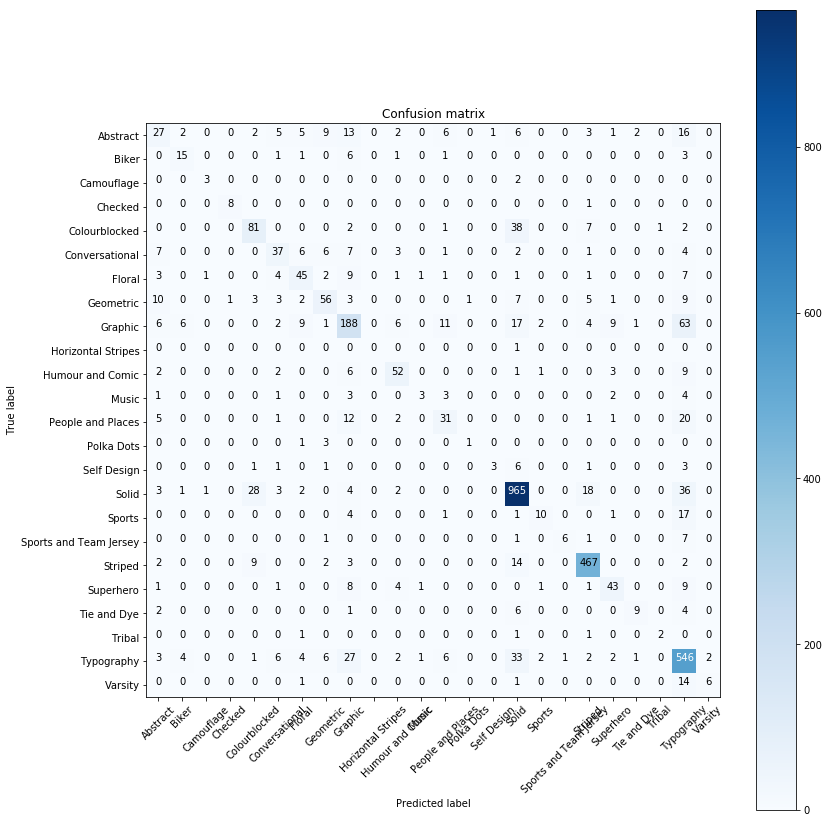

In [14]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.27     0.02     0.       0.       0.02     0.05     0.05     0.09     0.13     0.       0.02     0.       0.06
   0.       0.01     0.06     0.       0.       0.03     0.01     0.02     0.       0.16     0.     ]
 [ 0.       0.53571  0.       0.       0.       0.03571  0.03571  0.       0.21429  0.       0.03571  0.
   0.03571  0.       0.       0.       0.       0.       0.       0.       0.       0.       0.10714  0.     ]
 [ 0.       0.       0.6      0.       0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.4      0.       0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.88889  0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.11111  0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.61364  0.       0.       0.       0.01515  0.       0.       0.
 

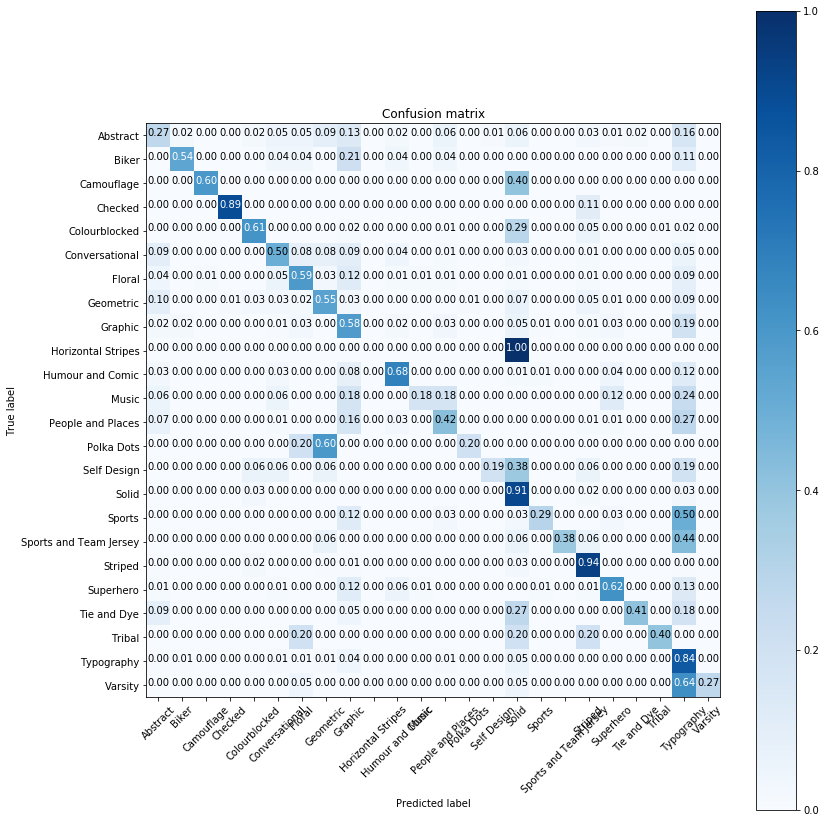

In [15]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [16]:
arch_201=dn201

In [17]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [18]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [19]:
learn_201 = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2)

100%|██████████| 107/107 [01:17<00:00,  1.39it/s]


In [20]:
learn_201.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.003065   0.947703   0.714673  
    1      0.948243   0.913057   0.724521                      
    2      0.904768   0.895348   0.73382                       
    3      0.836982   0.870777   0.739159                      
    4      0.794323   0.874339   0.746379                      



[0.87433916, 0.74637850478430778]

In [21]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.778543   0.857562   0.750339  
    1      0.721594   0.865185   0.749299                      



[0.86518455, 0.74929906553197134]

In [22]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.680455   0.867649   0.747173  
    1      0.657012   0.870988   0.747804                      



[0.87098789, 0.74780373818406431]

In [23]:
learn_201.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.568903   0.854709   0.755643  
    1      0.541499   0.85781    0.7541                        
    2      0.523708   0.847075   0.760689                      
    3      0.544989   0.84208    0.755935                       
    4      0.53397    0.84877    0.760105                      



[0.84876955, 0.76010514029832643]

In [24]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.558744   0.860224   0.754474  
    1      0.517849   0.8445     0.757395                      



[0.84450036, 0.7573948597239557]

In [25]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.511694   0.843386   0.762652  
    1      0.50398    0.843147   0.758563                      



[0.84314704, 0.75856308402302108]

In [26]:
learn_201.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.462075   0.837229   0.760023  
    1      0.475553   0.843942   0.759147                      



[0.84394211, 0.75914719617255377]

In [27]:
log_preds_201,y_201 = learn_201.TTA()
probs_201 = np.mean(np.exp(log_preds_201),0)
accuracy_np(probs_201, y_201)
y_201[10]=9
predictions_201 = np.argmax(probs_201,axis=1)
cm_201 = confusion_matrix(y_201, predictions_201)


Confusion matrix, without normalization
[[ 35   2   1   0   0   2   7   7  13   0   2   0   4   0   0   7   1   0  10   1   0   0   8   0]
 [  1  14   0   0   0   1   1   0   2   0   0   0   1   0   0   2   0   0   0   0   0   0   6   0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   7   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   1   0   0   0   0   0   0  46   0   0  10   0   0   0   5   0]
 [  5   0   0   0   0  31   8   8   5   0   3   0   1   0   0   3   0   0   0   0   0   0  10   0]
 [  7   0   0   0   0   3  44   3   8   0   0   0   0   0   0   5   0   0   1   0   0   0   5   0]
 [  2   0   0   3   2   3   1  52   6   0   0   0   0   0   0  13   0   0   6   1   0   0  12   0]
 [  7   6   0   0   1   3   5   1 191   0  10   0   7   0   0  15   0   0   3   6   0   0  70   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0

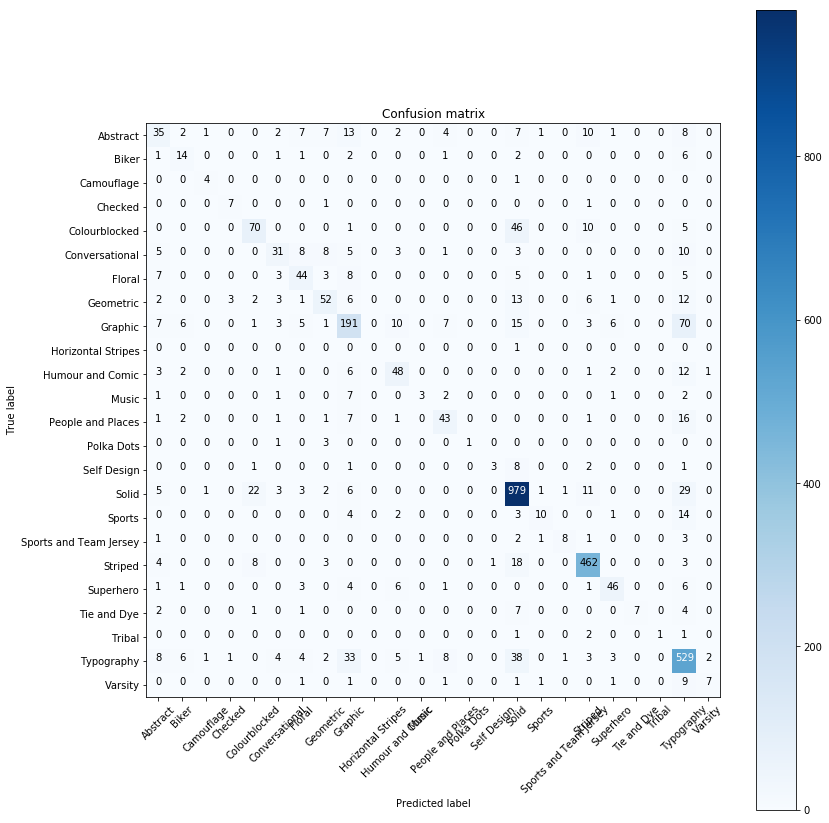

In [28]:
plot_confusion_matrix_mine(cm_201,data.classes,normalize=False)

In [29]:
probs_ensemble = probs_201 + probs

In [30]:
probs_ensemble[:2]

array([[ 0.00004,  0.     ,  0.     ,  0.     ,  0.     ,  0.00003,  0.00001,  0.00005,  0.00019,  0.     ,
         0.00001,  0.00001,  0.00033,  0.00001,  0.00004,  0.00307,  0.00007,  0.     ,  0.00003,  0.     ,
         0.00002,  0.     ,  1.99587,  0.00022],
       [ 0.00001,  0.     ,  0.00003,  0.00015,  0.00473,  0.00018,  0.     ,  0.00046,  0.00006,  0.00003,
         0.00001,  0.     ,  0.00003,  0.00001,  0.00004,  0.02361,  0.     ,  0.00001,  1.97004,  0.00001,
         0.00001,  0.00001,  0.00056,  0.00002]], dtype=float32)

In [31]:
probs_ensemble = probs_ensemble/2

In [32]:
probs_ensemble[:2]

array([[ 0.00002,  0.     ,  0.     ,  0.     ,  0.     ,  0.00001,  0.     ,  0.00003,  0.00009,  0.     ,
         0.00001,  0.     ,  0.00016,  0.     ,  0.00002,  0.00154,  0.00003,  0.     ,  0.00002,  0.     ,
         0.00001,  0.     ,  0.99793,  0.00011],
       [ 0.00001,  0.     ,  0.00002,  0.00008,  0.00236,  0.00009,  0.     ,  0.00023,  0.00003,  0.00001,
         0.     ,  0.     ,  0.00001,  0.     ,  0.00002,  0.0118 ,  0.     ,  0.     ,  0.98502,  0.00001,
         0.     ,  0.     ,  0.00028,  0.00001]], dtype=float32)

In [33]:
accuracy_np(probs_ensemble, y)


0.77260755048287977

In [34]:
accuracy_np(probs,y)

0.76207199297629502

In [35]:
accuracy_np(probs_201,y_201)

0.75943810359964881

In [36]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [37]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 31   2   0   0   1   3   4  10  13   0   2   0   6   0   1   7   0   0   6   2   2   0  10   0]
 [  0  16   0   0   0   1   1   0   3   0   1   0   2   0   0   0   0   0   0   0   0   0   4   0]
 [  1   0   3   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0  71   0   0   0   2   0   0   0   0   0   0  47   0   0   7   0   0   1   4   0]
 [  4   0   0   0   0  37   7   6   5   0   4   0   2   0   0   2   0   0   0   0   0   0   7   0]
 [  2   0   1   0   0   3  45   2   8   0   0   1   1   0   0   5   0   0   1   0   0   0   7   0]
 [  6   0   0   2   2   3   1  53   5   0   0   0   0   0   0  11   0   0   6   1   0   0  11   0]
 [  5   5   0   0   1   2   4   1 198   0   9   0   7   0   0  15   1   0   3   4   1   0  69   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0

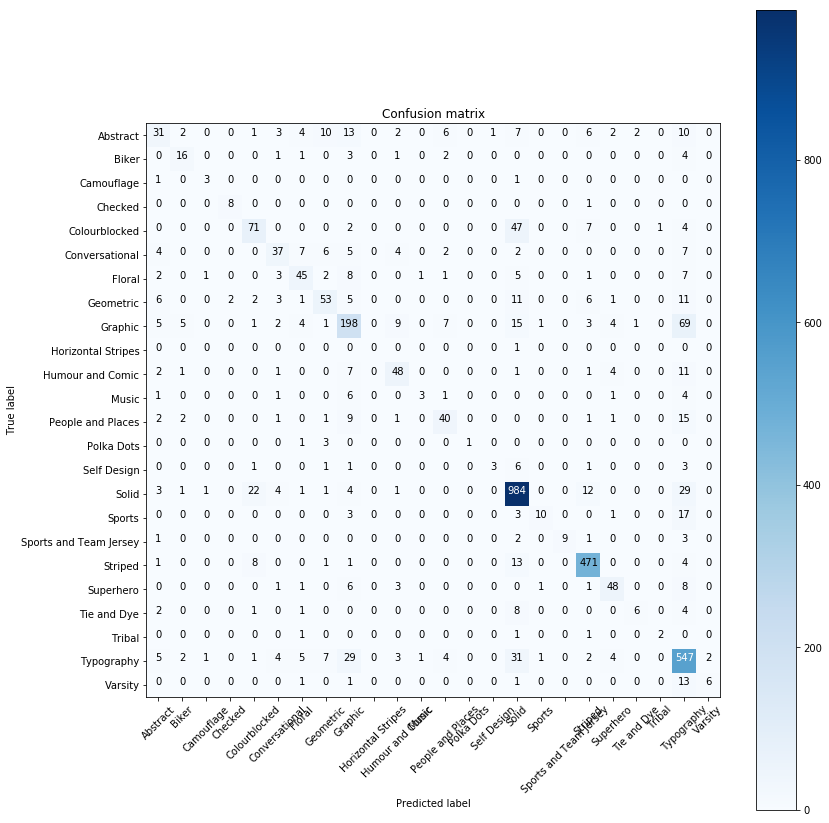

In [38]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.31     0.02     0.       0.       0.01     0.03     0.04     0.1      0.13     0.       0.02     0.       0.06
   0.       0.01     0.07     0.       0.       0.06     0.02     0.02     0.       0.1      0.     ]
 [ 0.       0.57143  0.       0.       0.       0.03571  0.03571  0.       0.10714  0.       0.03571  0.
   0.07143  0.       0.       0.       0.       0.       0.       0.       0.       0.       0.14286  0.     ]
 [ 0.2      0.       0.6      0.       0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.2      0.       0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.88889  0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.11111  0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.53788  0.       0.       0.       0.01515  0.       0.       0.  

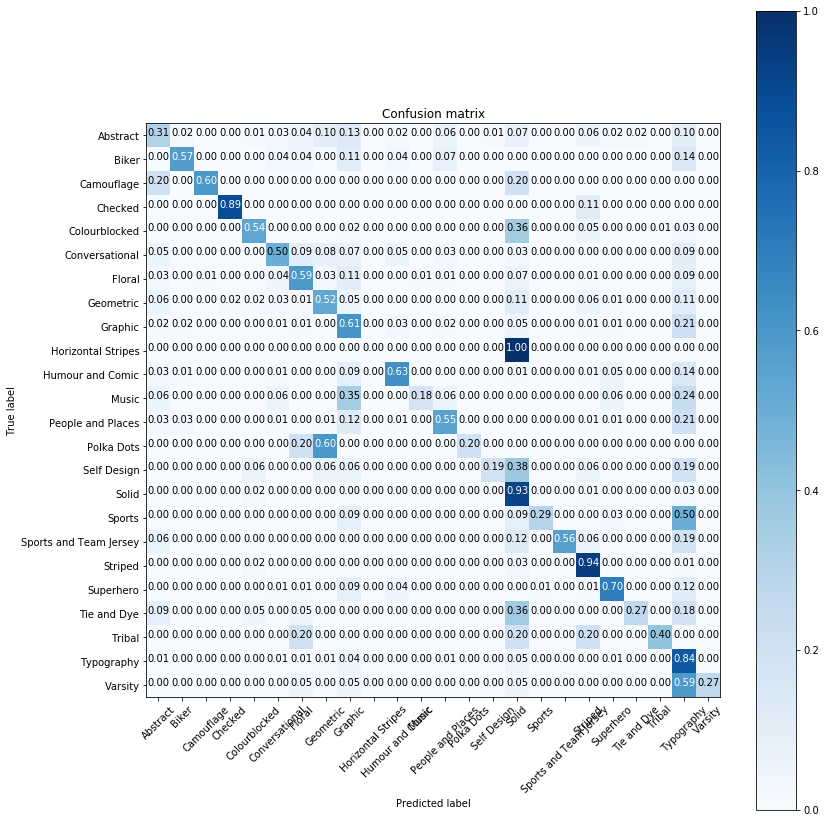

In [39]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [40]:
learn.unfreeze()

In [41]:
learn_201.unfreeze()

In [42]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [43]:
test = open_image(fname)
test= val_tfms((test))
test.shape

(3, 320, 320)

In [44]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

array([[ 0.00132,  0.00001,  0.00002,  0.00036,  0.01057,  0.00007,  0.00005,  0.00082,  0.011  ,  0.00002,
         0.00002,  0.00002,  0.00132,  0.00018,  0.00047,  0.95202,  0.00044,  0.     ,  0.00385,  0.00005,
         0.00428,  0.00001,  0.01284,  0.00027]], dtype=float32)

In [45]:
data.classes[np.argmax(pred_temp[0,:])]

'Solid'

In [46]:
pred_temp_201 = learn_201.predict_array(test[None])
pred_temp_201 = np.exp(pred_temp_201)
pred_temp_201

array([[ 0.00015,  0.     ,  0.00001,  0.00002,  0.00228,  0.00001,  0.     ,  0.00094,  0.00003,  0.00001,
         0.00001,  0.00001,  0.00006,  0.00029,  0.0002 ,  0.9935 ,  0.00036,  0.     ,  0.00009,  0.00011,
         0.00012,  0.     ,  0.00165,  0.00014]], dtype=float32)

In [47]:
data.classes[np.argmax(pred_temp_201[0,:])]

'Solid'

In [48]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [49]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [50]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [51]:
arch=resnext50
learn_resnext = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

100%|██████████| 107/107 [01:16<00:00,  1.39it/s]


In [52]:
learn_resnext.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.129559   1.026056   0.695023  
    1      1.030615   0.978349   0.706787                      
    2      0.966328   0.962131   0.710794                      
    3      0.935784   0.940814   0.716636                      
    4      0.836481   0.951567   0.725397                      



[0.95156652, 0.72539719632852862]

In [53]:
learn_resnext.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.865011   0.931698   0.730152  
    1      0.794799   0.943314   0.730526                      



[0.94331408, 0.73052570084545099]

In [54]:
learn_resnext.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.750021   0.934848   0.72965   
    1      0.753715   0.956782   0.73278                       



[0.9567821, 0.73278037409916097]

In [55]:
learn_resnext.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.596878   0.916751   0.742208  
    1      0.563311   0.919005   0.745129                      
    2      0.563204   0.933376   0.745794                      
    3      0.532884   0.924997   0.745421                      
    4      0.525069   0.935442   0.748049                      



[0.93544179, 0.74804906533143234]

In [56]:
learn_resnext.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.503435   0.936012   0.744918  
    1      0.505998   0.939201   0.744918                      



[0.93920124, 0.74491822441047595]

In [57]:
learn_resnext.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.471143   0.930364   0.745129  
    1      0.487037   0.922835   0.749007                      



[0.92283523, 0.749007009457205]

In [58]:
learn_resnext.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.481482   0.918737   0.752512  
    1      0.513567   0.938796   0.744918                      
    2      0.478043   0.935686   0.750467                      
    3      0.456364   0.943513   0.747255                      
    4      0.471509   0.949051   0.748423                      



[0.94905084, 0.7484228973076722]

In [59]:
log_preds_resnext,y_resnext = learn_resnext.TTA()
probs_resnext = np.mean(np.exp(log_preds_resnext),0)
accuracy_np(probs_resnext, y_resnext)

0.74978050921861283

In [60]:
y_resnext[10]=9

In [61]:
predictions_resnext = np.argmax(probs_resnext,axis=1)

In [62]:
cm = confusion_matrix(y_resnext, predictions_resnext)

Normalized confusion matrix
[[ 0.29     0.       0.01     0.       0.01     0.02     0.07     0.07     0.13     0.       0.02     0.       0.03
   0.       0.02     0.1      0.       0.       0.04     0.02     0.02     0.01     0.14     0.     ]
 [ 0.03571  0.46429  0.       0.       0.       0.       0.       0.       0.14286  0.       0.       0.
   0.07143  0.       0.       0.07143  0.       0.       0.       0.03571  0.       0.       0.17857  0.     ]
 [ 0.       0.       0.6      0.       0.       0.       0.2      0.       0.       0.       0.       0.       0.
   0.       0.       0.2      0.       0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.66667  0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.11111  0.       0.       0.22222  0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.52273  0.       0.       0.00758  0.00758  0.       0.       0.  

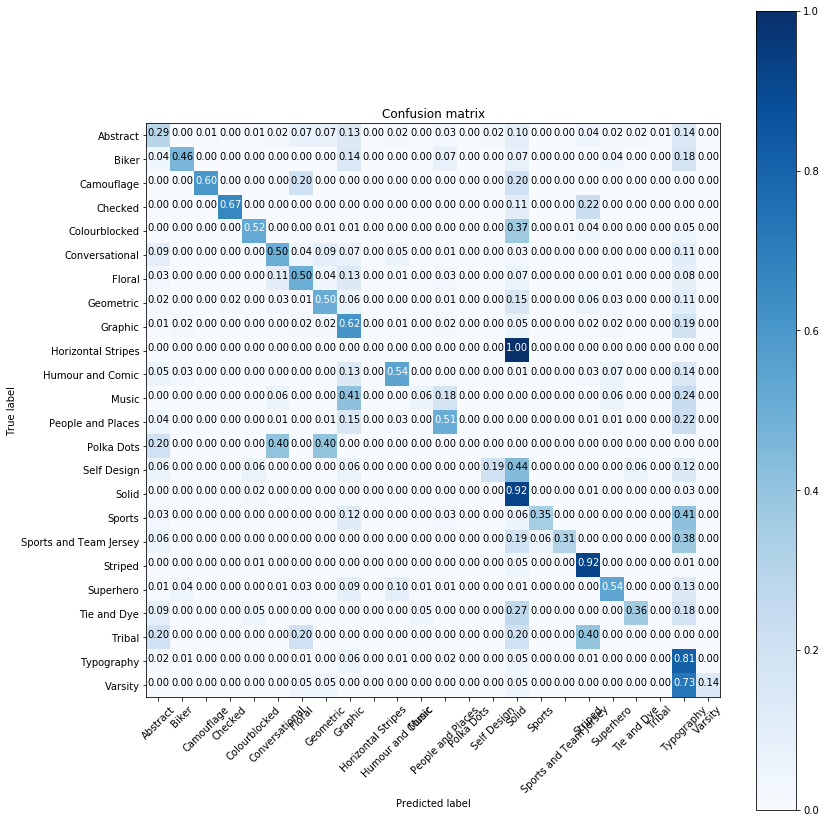

In [63]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [64]:
ensemble_two = probs_resnext + probs + probs_201

In [65]:
ensemble_two[:3]

array([[ 0.00026,  0.00001,  0.     ,  0.     ,  0.     ,  0.00008,  0.00002,  0.00007,  0.00037,  0.     ,
         0.00002,  0.00002,  0.00038,  0.00001,  0.00009,  0.00426,  0.00036,  0.     ,  0.00004,  0.     ,
         0.00002,  0.     ,  2.9935 ,  0.00049],
       [ 0.00007,  0.     ,  0.00003,  0.00017,  0.00474,  0.00022,  0.     ,  0.0005 ,  0.00023,  0.00003,
         0.00009,  0.00001,  0.00008,  0.00001,  0.00005,  0.02642,  0.     ,  0.00003,  2.96593,  0.00002,
         0.00001,  0.00001,  0.00133,  0.00002],
       [ 0.06095,  0.00396,  0.00001,  0.00023,  0.00264,  0.00927,  0.00166,  0.22196,  0.01575,  0.00005,
         0.0015 ,  0.00161,  0.05945,  0.00029,  0.0007 ,  0.06227,  0.005  ,  0.00006,  0.00281,  0.00009,
         0.00059,  0.00063,  2.54844,  0.00011]], dtype=float32)

In [66]:
ensemble_two = ensemble_two/3

In [67]:
accuracy_np(ensemble_two,y_resnext)

0.77436347673397721

In [68]:
predictions_ensemble_two = np.argmax(ensemble_two,axis=1)

In [69]:
predictions_ensemble

array([22, 18, 22, ...,  8, 15, 15])

In [70]:
cm = confusion_matrix(y_resnext, predictions_ensemble)

Normalized confusion matrix
[[ 0.31     0.02     0.       0.       0.01     0.03     0.04     0.1      0.13     0.       0.02     0.       0.06
   0.       0.01     0.07     0.       0.       0.06     0.02     0.02     0.       0.1      0.     ]
 [ 0.       0.57143  0.       0.       0.       0.03571  0.03571  0.       0.10714  0.       0.03571  0.
   0.07143  0.       0.       0.       0.       0.       0.       0.       0.       0.       0.14286  0.     ]
 [ 0.2      0.       0.6      0.       0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.2      0.       0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.88889  0.       0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.11111  0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.53788  0.       0.       0.       0.01515  0.       0.       0.  

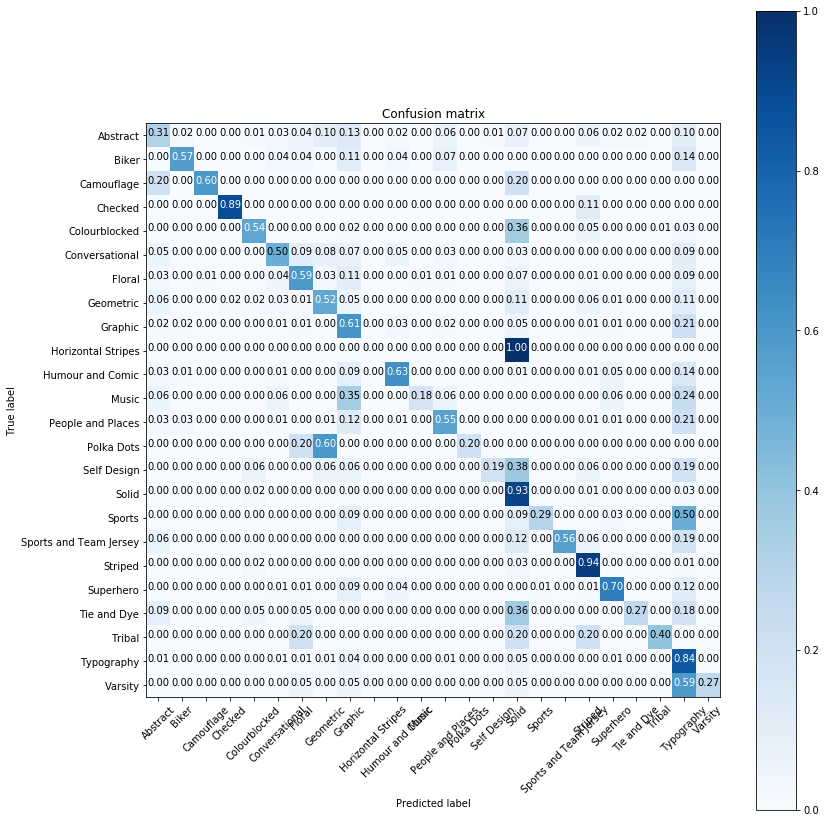

In [71]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [72]:
learn_resnext.unfreeze()

In [73]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_three = learn_resnext.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two+pred_three)/3
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

0Solid
1Solid
2Solid
3Conversational
4Typography
5Checked
6Typography
7Typography
8Solid
9Solid
10Solid
11Geometric
12Typography
13Striped
14Striped
15Typography
16Colourblocked
17Typography
18Striped
19Tie and Dye
20Solid
21Typography
22Solid
23Typography
24Conversational
25Solid
26Striped
27Solid
nan
29Solid
30Superhero
31Typography
32Striped
33Striped
34Typography
35Typography
36Floral
37Solid
38Graphic
39Colourblocked
40Solid
41Conversational
42Striped
43Camouflage
44Striped
45Solid
46Solid
47Typography
48Typography
49Graphic
50Typography
51Typography
52Striped
53Solid
54Solid
55Solid
56Typography
57Typography
58Solid
59Floral
60Typography
61Graphic
62Typography
63Solid
64Typography
65Typography
66Colourblocked
67Floral
68Typography
69Solid
70Solid
71Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-SLT/PERLE-SLT_1.jpg
73Typography
74Striped
75Solid
76Typography
77Solid
78Solid
79Abstract
80Typography
81Solid
82Solid
83Typography
84Striped
85Solid
86Typography
87T

703Solid
704Solid
705Typography
706Solid
707Striped
708Solid
709Solid
710Striped
711Typography
712Graphic
713Typography
714Typography
715Typography
716Solid
717Typography
718Striped
719Solid
720Typography
721Solid
722Solid
723Solid
724Typography
725Solid
726Typography
727Typography
728Striped
729Solid
730Solid
731Typography
732Geometric
733Striped
nan
735Solid
736Solid
737Solid
738Colourblocked
739Graphic
740Geometric
741Striped
742Graphic
743Solid
744Solid
745Typography
746Typography
747Solid
748Typography
749Solid
750People and Places
751Solid
752Solid
753Solid
754Graphic
755Typography
756Solid
757Tribal
758Solid
759Solid
760Floral
761Striped
762Typography
763Striped
764Colourblocked
765Typography
766Floral
767Typography
768Colourblocked
769Striped
770Typography
771Solid
772Solid
773Solid
774Striped
775Striped
776Typography
777Solid
778Typography
779Solid
780Typography
781Striped
782Striped
783Typography
784Typography
785Colourblocked
786Typography
787Solid
788Typography
789Solid
790

1384Solid
1385Solid
1386Solid
nan
1388Solid
1389Solid
1390Typography
1391Conversational
1392Solid
1393Typography
1394Typography
1395Typography
1396Striped
1397Typography
1398Graphic
1399Solid
1400Superhero
1401Typography
1402Solid
1403Typography
1404Sports and Team Jersey
1405Typography
1406Typography
1407Typography
1408Typography
1409Geometric
1410Solid
1411Solid
1412Solid
1413Geometric
1414Typography
1415Typography
1416Solid
1417Solid
1418Solid
1419Biker
1420Solid
1421Typography
1422Graphic
1423Typography
1424Solid
1425Solid
1426Striped
1427Typography
1428Floral
1429Typography
1430Solid
1431Solid
1432Solid
1433Solid
1434Humour and Comic
1435Striped
1436Solid
1437Graphic
1438Typography
1439Striped
1440Striped
1441Typography
1442Solid
1443Solid
1444Solid
1445Typography
1446Striped
1447Geometric
1448Typography
1449Solid
1450Striped
1451Typography
1452Solid
1453Solid
1454People and Places
1455Solid
nan
1457Conversational
1458Typography
1459Conversational
1460Geometric
1461Solid
1462Solid

2021Typography
2022Solid
2023Solid
2024Striped
2025Typography
2026Graphic
2027Striped
2028Striped
2029Striped
2030Solid
2031Solid
2032Striped
2033Typography
2034Typography
2035Solid
2036Striped
2037Checked
2038Solid
2039Typography
2040Floral
2041Floral
2042Solid
2043Solid
2044Typography
2045Typography
2046Abstract
2047Solid
2048Solid
2049Solid
2050Solid
2051Solid
2052Floral
2053Striped
2054Typography
nan
2056Striped
2057Geometric
2058Abstract
2059Typography
2060Striped
2061Typography
2062People and Places
2063Striped
2064Graphic
2065Solid
2066People and Places
2067Solid
2068Solid
2069Graphic
2070Solid
2071Solid
2072Conversational
2073Colourblocked
2074Typography
2075Solid
2076Floral
2077Solid
2078Solid
2079Typography
2080Typography
2081Solid
2082Typography
2083Solid
2084Superhero
2085Solid
2086Solid
2087Solid
2088Solid
2089Striped
2090Graphic
2091Solid
2092Typography
2093Striped
2094Solid
2095Solid
2096Typography
2097Solid
2098Typography
2099Solid
2100Solid
2101Floral
2102Solid
2103Typ

2671Camouflage
2672Solid
2673Abstract
2674Typography
2675Striped
2676Colourblocked
2677Typography
2678Typography
2679Typography
2680Solid
2681Typography
2682Typography
2683Typography
2684Striped
2685Graphic
2686Solid
2687Striped
2688Striped
2689Striped
2690Striped
2691Typography
2692Solid
2693Striped
2694Typography
2695Typography
2696Solid
2697Striped
2698Solid
2699Graphic
2700Typography
2701Typography
2702Solid
2703Solid
2704Solid
2705Solid
2706Humour and Comic
2707Typography
2708Typography
2709Solid
2710Graphic
2711Solid
2712Solid
2713Solid
2714Typography
2715Solid
2716Graphic
2717Solid
2718Typography
2719Striped
2720Graphic
2721Typography
2722Music
2723Typography
2724Geometric
2725Solid
2726Typography
2727Striped
nan
2729Solid
2730Solid
2731People and Places
https://www.dropbox.com/s/ej4fvmfcbv8v1wu/6%2C1.jpg
2733Typography
2734Typography
2735Solid
2736Solid
2737Striped
2738Geometric
2739Solid
2740Typography
2741Striped
2742Typography
2743Solid
2744Abstract
nan
2746Striped
2747Strip

3329Solid
3330People and Places
3331Solid
3332People and Places
3333Striped
3334Typography
3335Solid
3336Graphic
3337Typography
3338Typography
3339Typography
nan
3341Typography
3342Floral
3343Solid
3344Solid
3345Typography
3346Typography
3347Typography
3348Typography
3349Striped
3350Graphic
3351Typography
3352Graphic
3353Striped
3354Solid
3355Striped
3356Graphic
3357Typography
3358Abstract
3359Solid
3360Solid
3361Colourblocked
3362Graphic
3363Graphic
3364Solid
3365Solid
3366Striped
3367Sports
3368Floral
3369Solid
3370Typography
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2779_White/FLIPKART_2.jpg
3372Typography
3373Graphic
3374Geometric
3375Solid
3376Typography
3377Solid
3378Typography
3379Sports
3380Striped
3381Solid
3382Solid
3383Solid
3384Geometric
3385Solid
3386Striped
3387Typography
3388Solid
3389Solid
3390Striped
3391Solid
3392Solid
3393Geometric
3394Solid
3395Solid
3396Solid
3397Typography
3398Solid
3399Typography
3400Solid
3401Typography
3402Typography
3403

3960Typography
3961Solid
3962Solid
3963Colourblocked
3964Solid
3965Solid
3966Solid
3967Typography
3968Solid
3969Solid
3970Conversational
3971Typography
3972Striped
3973Solid
3974Solid
3975Abstract
3976Typography
3977Solid
3978Striped
3979Solid
3980Floral
3981Solid
3982Typography
3983Solid
3984Typography
3985Solid
3986Striped
3987Superhero
3988Solid
3989Typography
3990Solid
3991Solid
3992Floral
3993Typography
3994Solid
3995Typography
nan
3997Solid
3998Solid
3999People and Places
4000Solid
4001Typography
4002Graphic
4003Solid
4004Solid
4005Solid
4006Solid
4007People and Places
4008Solid
4009Typography
4010Typography
4011Graphic
4012Striped
4013Striped
nan
4015Typography
4016Solid
4017Solid
4018Solid
4019Floral
4020Typography
4021Striped
4022Graphic
4023People and Places
4024Solid
4025Typography
4026Solid
4027Solid
4028Striped
4029Solid
4030Solid
4031Solid
4032Graphic
4033Typography
4034Colourblocked
4035Solid
4036Striped
4037Typography
4038Typography
4039Typography
4040Solid
4041Typograp

4613Solid
nan
4615Striped
4616Humour and Comic
4617Striped
4618Graphic
4619Solid
4620People and Places
4621Graphic
4622Solid
4623Typography
4624Typography
4625Geometric
4626Typography
4627Typography
4628Striped
4629Striped
4630Solid
4631Solid
4632Solid
4633Solid
4634Solid
4635Typography
4636Solid
4637Typography
4638Solid
4639Typography
4640Solid
4641Typography
4642Solid
4643Checked
4644Typography
4645Solid
4646Striped
4647Typography
4648Graphic
4649Typography
4650Typography
4651Solid
4652Superhero
4653Solid
4654Solid
4655Solid
4656Solid
4657Graphic
4658Typography
4659Floral
4660Solid
4661Solid
4662Typography
4663Geometric
4664Solid
4665Striped
4666Graphic
4667Striped
4668Colourblocked
4669Striped
4670Striped
4671Geometric
4672Striped
4673Typography
4674Typography
4675Typography
4676Striped
4677Striped
4678Humour and Comic
4679Geometric
4680Camouflage
4681Solid
4682Solid
4683Solid
4684Solid
4685Solid
4686Typography
4687Striped
4688Typography
4689Solid
4690Typography
4691Striped
4692Stri

5244Striped
5245Solid
5246Solid
5247Solid
5248Solid
5249Graphic
5250Floral
5251Graphic
5252Geometric
5253Geometric
5254Solid
5255Typography
5256Solid
5257Conversational
5258Typography
5259Graphic
5260Typography
5261Typography
5262Solid
5263Solid
5264Striped
5265Striped
5266Typography
5267Solid
5268Colourblocked
5269Typography
5270Solid
5271Striped
5272Solid
5273Solid
5274Striped
5275Solid
5276Striped
5277Solid
5278Solid
5279Typography
5280Striped
5281People and Places
5282Typography
5283People and Places
5284Typography
5285Typography
5286Solid
5287People and Places
5288Striped
5289Floral
5290Typography
5291Solid
5292Graphic
5293Typography
nan
5295Solid
5296Solid
5297Striped
5298Solid
5299Solid
5300Typography
5301Solid
5302Typography
5303Typography
5304Solid
5305Geometric
5306Solid
5307Typography
5308Solid
5309Typography
5310Striped
5311Striped
5312Graphic
5313Solid
5314Solid
5315Solid
5316Solid
5317Striped
5318Typography
5319Typography
5320Typography
5321Solid
5322People and Places
nan

5901Solid
5902Solid
5903Solid
5904Solid
5905Geometric
5906Solid
5907Typography
5908Solid
5909Solid
5910Solid
5911Solid
5912Striped
5913Typography
5914Striped
5915Typography
5916Solid
5917Solid
5918Solid
5919People and Places
5920Typography
5921Solid
5922Solid
5923Geometric
5924Solid
5925Solid
5926Solid
5927Striped
5928Striped
5929Typography
5930Solid
5931Striped
5932Solid
5933Solid
5934Typography
5935Solid
5936Typography
5937Solid
5938Solid
5939Solid
5940Tie and Dye
5941Solid
5942Solid
5943Striped
5944Solid
5945Solid
5946Floral
5947Typography
5948Solid
5949Solid
5950Solid
5951Solid
5952Solid
5953Striped
5954Striped
5955Typography
5956Striped
5957Colourblocked
5958Striped
5959Striped
5960Graphic
nan
5962Typography
5963Conversational
5964Typography
5965Striped
5966Solid
5967Typography
5968Solid
5969Typography
5970Striped
5971Solid
5972Graphic
5973Solid
5974Solid
5975Striped
5976Typography
5977Solid
5978Solid
5979Typography
5980Typography
5981Striped
5982Solid
5983Solid
5984Typography
598

6541Striped
6542Solid
6543Striped
6544Solid
6545Abstract
6546Abstract
6547Graphic
6548Solid
6549Geometric
6550Solid
6551Typography
6552Typography
6553People and Places
6554Striped
nan
6556Typography
6557Solid
nan
6559Solid
6560Typography
6561Solid
6562Striped
6563Typography
6564Solid
6565Solid
6566Solid
6567Typography
6568Typography
6569Striped
6570Typography
6571Striped
6572Typography
6573Striped
nan
6575Solid
6576Solid
6577Solid
6578Colourblocked
6579Graphic
6580Solid
6581Geometric
6582Typography
6583Typography
6584Typography
6585Typography
6586Solid
6587Typography
6588Typography
6589Solid
6590Solid
6591Geometric
6592Striped
6593Striped
6594Solid
6595Solid
6596Solid
6597Striped
6598Graphic
6599Colourblocked
6600Solid
6601Sports
6602Typography
6603Typography
6604Solid
6605Solid
6606Striped
6607Typography
6608Typography
6609Floral
6610Solid
6611Humour and Comic
6612Solid
6613Solid
6614Typography
6615Solid
6616Striped
6617Typography
6618Geometric
6619Solid
6620Conversational
6621Abstrac

7204Typography
7205Solid
7206Striped
7207Geometric
7208Solid
7209Striped
7210Superhero
nan
7212Solid
7213Solid
7214Typography
7215Conversational
7216Striped
7217Graphic
7218Solid
7219Solid
7220Abstract
7221Typography
7222Typography
7223Solid
7224Solid
7225Striped
7226Typography
7227Superhero
7228Solid
7229Solid
7230Abstract
7231Conversational
7232Solid
7233Colourblocked
7234Typography
7235Solid
7236Solid
7237Typography
7238Colourblocked
7239Solid
7240Solid
7241Striped
7242Solid
7243Typography
7244Solid
7245Solid
7246Typography
7247Striped
7248Typography
7249Solid
7250Solid
7251Striped
7252Solid
7253Graphic
7254Graphic
7255Striped
7256Striped
7257Camouflage
7258Striped
7259Graphic
7260Striped
7261Solid
7262Solid
7263Solid
7264Solid
7265Solid
7266Striped
7267Solid
7268Solid
7269Solid
7270Typography
7271People and Places
7272Solid
7273Solid
7274Graphic
7275Solid
7276Geometric
7277Typography
7278Typography
7279Solid
7280Solid
7281Solid
7282Striped
7283Solid
7284Solid
7285Striped
7286Solid


7845Solid
7846Solid
7847Typography
7848Typography
7849Typography
7850Solid
7851Solid
7852Typography
7853Typography
7854People and Places
7855Typography
7856Striped
7857Solid
7858Typography
7859Floral
7860Solid
7861Typography
7862Striped
7863Solid
7864Typography
7865Striped
7866Solid
7867Solid
7868Graphic
7869Typography
7870Solid
7871Striped
nan
7873Striped
7874Graphic
7875Typography
7876Graphic
7877Striped
7878Solid
7879Solid
7880Typography
7881Typography
7882Striped
7883Floral
7884People and Places
7885Solid
7886Solid
7887Solid
7888Graphic
7889Solid
7890Graphic
7891Solid
7892Typography
7893Solid
7894Striped
7895Solid
7896Striped
7897Solid
7898Solid
7899Solid
7900Striped
7901Solid
7902Solid
7903Typography
7904Solid
7905Solid
7906Typography
7907Typography
7908Typography
7909Solid
7910Solid
7911Solid
7912Solid
7913Typography
7914Solid
7915Typography
7916Solid
7917Typography
7918Typography
7919Solid
7920Typography
7921Geometric
7922Solid
7923Striped
7924Typography
7925Solid
7926Typography

8499Solid
8500Solid
8501Solid
8502Solid
8503Typography
8504Graphic
8505Tie and Dye
8506Typography
8507Solid
8508Solid
8509Typography
8510Geometric
8511Solid
8512Typography
8513Solid
8514Striped
8515Solid
8516Colourblocked
nan
8518Striped
8519Solid
8520Solid
8521Typography
8522Solid
8523Typography
8524Geometric
8525Solid
8526Solid
8527Colourblocked
8528Striped
8529Solid
8530Solid
8531Solid
8532Solid
8533Geometric
8534Solid
8535Typography
8536Solid
8537Typography
8538Solid
8539Solid
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2633_White/FLIPKART_2.jpg
8541Humour and Comic
8542Typography
8543Striped
8544Solid
8545Typography
8546Solid
8547Typography
8548Graphic
8549Striped
8550Striped
8551Solid
8552Graphic
8553Typography
8554Typography
8555Typography
8556Solid
8557Solid
8558Striped
8559Typography
8560Solid
8561Typography
8562Solid
8563Striped
8564Typography
8565Striped
8566Solid
8567Conversational
8568Typography
8569Striped
8570Striped
8571Humour and Comic
8572Typograp

9142Solid
9143Solid
nan
9145Solid
9146Solid
9147Typography
9148Solid
9149Graphic
9150Solid
9151Solid
9152Graphic
9153Solid
9154Abstract
9155Typography
9156Solid
9157Solid
9158Solid
9159Colourblocked
9160Solid
9161Solid
9162Solid
9163Solid
9164Solid
9165Solid
9166Typography
9167Striped
9168Solid
9169Solid
9170Solid
9171Typography
9172Solid
9173Typography
9174Striped
9175Typography
9176Solid
9177Striped
9178Solid
9179Typography
9180Solid
9181Typography
9182Striped
9183Typography
9184Solid
9185Solid
9186Typography
9187Geometric
9188Typography
9189Typography
9190Solid
9191Graphic
9192Graphic
9193Solid
9194Solid
9195Checked
9196Abstract
9197Typography
9198Typography
9199Typography
9200People and Places
9201Striped
9202Tie and Dye
9203Solid
9204Typography
9205Striped
9206Striped
9207Typography
9208Solid
9209Solid
9210Striped
9211Typography
9212Striped
9213Typography
9214Geometric
9215Colourblocked
http://repo.karvyecom.com/image-repository/Classic/PERLE-STB/PERLE-STB_1.jpg
9217Colourblocked


9786Solid
9787Superhero
9788Typography
9789Graphic
9790Typography
9791Typography
9792Typography
9793Solid
9794Graphic
9795Graphic
9796Solid
9797Solid
9798Solid
9799Striped
9800Graphic
9801Striped
9802Solid
9803Solid
9804Biker
9805Typography
9806Solid
9807Solid
nan
9809Solid
9810Solid
9811Solid
9812Abstract
9813Typography
9814Typography
9815Striped
9816Striped
9817Typography
9818Solid
9819Solid
9820Graphic
9821Solid
9822Graphic
9823People and Places
9824Striped
9825Striped
9826Solid
9827Striped
9828Typography
9829Striped
9830Graphic
9831Typography
9832Solid
9833Typography
9834Graphic
9835Typography
9836Striped
9837Striped
9838Typography
9839Geometric
9840Solid
9841Typography
9842Solid
9843Typography
9844Typography
9845Solid
9846Striped
9847Solid
9848Conversational
9849Striped
9850Striped
9851Solid
9852Typography
9853Solid
9854Typography
9855Graphic
9856Typography
9857Typography
nan
9859Typography
9860Typography
9861Solid
9862Striped
9863Typography
9864Solid
9865Superhero
9866Typography


10406Striped
10407Typography
10408Typography
10409Typography
10410Striped
10411Solid
10412Striped
10413Solid
10414Striped
10415Solid
10416Striped
10417Typography
nan
10419Typography
10420Striped
10421Typography
10422Solid
10423Typography
10424Typography
10425Typography
10426Typography
10427Typography
10428Solid
10429Solid
10430Floral
10431Solid
10432Typography
10433Solid
10434Floral
10435Solid
10436Solid
10437Abstract
10438Striped
10439Solid
10440Solid
10441Typography
10442Solid
10443Typography
10444Solid
10445Graphic
10446Typography
10447Striped
10448Humour and Comic
10449Solid
10450Striped
10451Solid
10452Typography
10453Abstract
10454Striped
10455Solid
10456Solid
10457Solid
10458Striped
10459Solid
10460Solid
10461Solid
10462Conversational
10463Solid
10464Floral
10465Graphic
10466Solid
10467Solid
10468Striped
10469Typography
10470Solid
10471Striped
10472Typography
10473Solid
10474Typography
10475Typography
10476Striped
10477Striped
10478Solid
10479Striped
10480Typography
10481Solid
1

10995Solid
10996Solid
10997Striped
10998Colourblocked
10999Striped
11000Typography
11001Solid
11002Colourblocked
11003Superhero
11004Solid
11005People and Places
11006Striped
11007Solid
nan
11009Solid
11010Typography
11011Geometric
11012Typography
11013Solid
11014Striped
11015Solid
11016Graphic
11017Striped
11018Solid
11019Striped
11020Striped
11021Checked
11022Geometric
11023Typography
11024Typography
11025Solid
11026Solid
11027Striped
11028Colourblocked
11029Typography
11030Abstract
11031Solid
11032Typography
11033Solid
11034Typography
11035Solid
11036Solid
11037Typography
11038Typography
11039Solid
11040Typography
nan
11042Solid
11043Typography
11044Solid
11045Solid
11046Striped
11047Graphic
11048Floral
11049Striped
11050Solid
11051Typography
11052People and Places
11053Solid
11054Geometric
11055Solid
11056Solid
nan
11058Striped
11059Typography
nan
11061Floral
11062Graphic
11063Typography
11064Graphic
11065Solid
11066Striped
11067Striped
11068Typography
11069Solid
11070Solid
11071St

11583Solid
11584Solid
11585Striped
11586Typography
11587Solid
11588Striped
11589Typography
11590Solid
11591Typography
11592Striped
11593Typography
11594Typography
11595Typography
11596Typography
11597Solid
11598Solid
11599Solid
11600Typography
11601Humour and Comic
11602Striped
11603Typography
11604Striped
11605Solid
11606Typography
11607Typography
11608Solid
11609Typography
11610Striped
11611Solid
11612Typography
11613Solid
11614Solid
11615Solid
11616Striped
11617Typography
11618Solid
11619Striped
11620Striped
11621Solid
11622Typography
11623Striped
11624Striped
nan
11626Striped
11627Typography
11628Striped
11629Striped
11630Solid
11631Striped
11632Striped
11633Solid
11634Solid
11635Striped
11636Solid
11637Typography
11638Solid
11639Solid
11640Geometric
11641Typography
11642Solid
11643Typography
11644Solid
11645Solid
11646Graphic
11647Typography
11648Typography
11649Solid
11650Graphic
11651Solid
11652Typography
11653Striped
11654Graphic
11655Striped
11656People and Places
11657Floral


12198Solid
12199Solid
12200Striped
12201Striped
12202Typography
12203Graphic
12204Floral
12205Solid
12206Typography
12207Typography
12208Striped
12209Typography
12210Typography
12211Graphic
12212Graphic
12213Graphic
12214Superhero
12215Striped
12216Geometric
12217Typography
12218Typography
12219Solid
12220Typography
12221Striped
12222Solid
12223Solid
12224Humour and Comic
12225Striped
12226Solid
12227Solid
12228Solid
12229Floral
12230Typography
12231Solid
12232Solid
12233Typography
12234Typography
12235Typography
12236Solid
12237Geometric
12238Solid
12239Solid
12240Solid
12241Striped
12242Solid
12243Abstract
12244Solid
12245Striped
12246Striped
12247Graphic
12248Graphic
12249Solid
12250Solid
12251Typography
12252Typography
12253Typography
12254Solid
12255Typography
12256Solid
https://www.dropbox.com/s/e1mhlrvrozvvodo/2400150%20%281%29.jpg
12258Typography
12259People and Places
12260Typography
12261Solid
12262Solid
12263Solid
12264Typography
12265Conversational
12266Solid
12267Solid
122

12805Solid
12806Graphic
12807Typography
12808Striped
12809Tribal
12810Varsity
12811Camouflage
12812Typography
12813Solid
12814Striped
12815Conversational
12816Typography
12817Solid
12818Typography
12819Solid
12820Typography
12821Colourblocked
12822Solid
12823Humour and Comic
12824Typography
12825Solid
12826Striped
12827Striped
12828Tie and Dye
12829Typography
12830Solid
12831Typography
12832Solid
12833Solid
12834Solid
12835Solid
12836Striped
12837Solid
12838Solid
12839Solid
12840Solid
12841Solid
12842Solid
12843Solid
12844Striped
12845Solid
12846Geometric
12847Solid
12848Solid
12849Solid
12850Typography
12851Typography
12852Solid
12853Solid
12854Floral
12855Solid
12856Typography
12857Solid
12858Striped
12859Striped
12860Typography
12861Striped
12862Music
12863Striped
12864Solid
12865Striped
12866Solid
12867Typography
12868People and Places
12869Solid
12870Solid
12871Typography
12872Striped
12873Typography
12874Solid
12875Solid
12876Solid
12877Solid
12878Typography
12879Solid
12880Typog

13419Solid
13420Solid
13421Solid
13422Solid
13423Typography
13424Typography
13425Solid
13426Solid
13427Typography
13428Typography
13429Solid
13430Solid
13431Typography
13432People and Places
13433Typography
13434Graphic
13435Typography
13436Typography
13437Solid
13438Solid
13439Abstract
13440Typography
13441Striped
13442Striped
13443Solid
13444Conversational
13445Solid
13446Striped
13447Solid
13448Conversational
13449Typography
13450Typography
13451Solid
13452Typography
13453Typography
13454Typography
13455Typography
13456Floral
nan
13458Striped
13459Graphic
13460Solid
13461Typography
13462Solid
13463Striped
13464Solid
13465Solid
13466Typography
13467Solid
13468Striped
13469Solid
13470Striped
13471Graphic
13472Solid
13473Typography
13474Colourblocked
13475Typography
13476Solid
13477Typography
13478Typography
13479Tie and Dye
13480Striped
13481Solid
13482Solid
13483Floral
13484Typography
13485Typography
13486Solid
13487Typography
13488Typography
13489Solid
13490Typography
13491Typograph

14027Striped
14028Solid
14029Typography
14030Geometric
14031Striped
14032Typography
14033Solid
14034Typography
14035Typography
14036Solid
14037Solid
14038Solid
14039Striped
14040Solid
14041Solid
14042Solid
14043Typography
14044Solid
14045Solid
14046Typography
14047Striped
14048Striped
14049Typography
14050Striped
14051Solid
14052Solid
14053Striped
14054Solid
14055Striped
14056Typography
14057Colourblocked
14058Typography
14059Solid
14060Graphic
14061Typography
14062Solid
14063Solid
14064Striped
14065Typography
14066Striped
14067Geometric
14068Colourblocked
14069Striped
14070Striped
14071Typography
14072Solid
14073Striped
14074Typography
14075Striped
14076Striped
14077Solid
14078Graphic
14079Solid
14080Solid
14081Typography
14082Striped
14083Solid
14084Solid
nan
14086Geometric
14087Striped
14088Solid
14089Striped
14090Typography
14091Typography
14092Colourblocked
14093Humour and Comic
14094Typography
14095Typography
14096Abstract
14097Colourblocked
14098Solid
14099Solid
14100Typography


14643Solid
14644Striped
14645Solid
14646Typography
14647Solid
14648Solid
14649Typography
14650Typography
14651Solid
14652Solid
14653Solid
14654Solid
14655Striped
14656Solid
14657Solid
14658Solid
14659Solid
14660Graphic
nan
14662Typography
14663Typography
14664Solid
nan
14666Solid
14667Typography
14668Colourblocked
14669Typography
14670Solid
14671Typography
14672Solid
14673Solid
14674Striped
14675Solid
14676Solid
14677Striped
14678Striped
14679Striped
14680Typography
14681Typography
14682Graphic
14683Striped
14684Typography
14685Typography
14686Striped
14687Colourblocked
14688Floral
14689Camouflage
14690Striped
14691People and Places
14692Solid
14693Graphic
14694Solid
14695Graphic
14696Camouflage
14697Solid
14698Solid
nan
14700Striped
14701Biker
14702Solid
14703Colourblocked
14704Graphic
14705Typography
14706Typography
14707Graphic
14708Checked
14709Striped
14710Solid
14711Solid
14712Graphic
14713Graphic
nan
14715Striped
14716Typography
14717Typography
14718Solid
14719Solid
14720Solid
1

In [74]:
df.to_csv('myntra-ensemble-three.csv',index=False)